In [1]:
import  time
import pandas as pd
import numpy as np
from multiprocessing import Pool
import math, os, shutil
from tqdm.auto import tqdm
import matplotlib.pyplot as plt
from scipy.io import readsav
import glob
import datetime, statistics
from aetherpy.io import read_routines
from math import cos, radians, sin, sqrt
from scipy import spatial, signal

import fnmatch

import geopandas
import geopandas
import sys

from scipy.interpolate import LinearNDInterpolator, interp1d

%matplotlib inline

/glade/work/abukowski/conda-envs/simstorm/lib/python3.11/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [66]:
from utility_programs.read_routines import SAMI
from utility_programs.filters import make_fits

## Settings

In [3]:
sami_data, times = SAMI.read_sami_data('/glade/u/home/abukowski/scratch/GITM-simstorm-run1/sami-gitm-coupled/',
                                datetime.datetime(2011,5,20), datetime.datetime(2011,5,21,12), t_start_idx=1, t_end_idx=1, 
                                pbar=True,cols=['edens'])

reading SAMI data: 100%|██████████| 24/24 [00:04<00:00,  5.72it/s]


In [33]:
def interp_one_map(x, y, c, ):

    xmin = min(x)
    xmax = max(x)
    ymin = min(y)
    ymax = max(y)

    grid_x,grid_y = np.meshgrid(np.linspace(xmin,xmax,nlons),np.linspace(ymin,ymax,nlats))
    loc_grid = list(zip(x, y))
    interp = LinearNDInterpolator(loc_grid , c, rescale = True)

    znew = interp(list(zip(grid_x.flatten(), grid_y.flatten())))
    return grid_x, grid_y, znew.reshape(nlons,nlats)

In [5]:
sami_data.keys()

dict_keys(['grid', 'data'])

In [4]:
nlats = 66
nlons = 91
target_alt = 300
percent_thresh = .04
lat_lim = 65
nt = 9

In [5]:
times[nt]

datetime.datetime(2011, 5, 21, 11, 45)

In [6]:
p_mask = (np.abs(sami_data['grid']['alt'].flatten() - target_alt) <= (target_alt*percent_thresh)) & (np.abs(sami_data['grid']['glat'].flatten()) - lat_lim < 0)
target_alt*percent_thresh, np.sum(p_mask), np.product(sami_data['grid']['alt'].shape), sami_data['data']['edens'].shape

(12.0, 22646, 1474560, (80, 72, 256, 24))

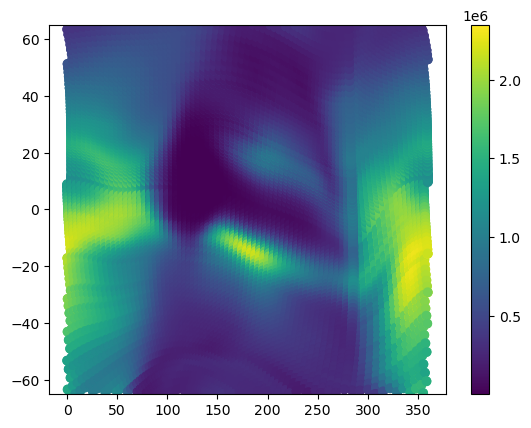

In [7]:
plt.scatter(sami_data['grid']['glon'].flatten()[p_mask],
           sami_data['grid']['glat'].flatten()[p_mask],
           c = sami_data['data']['edens'][:,:,:,nt].flatten()[p_mask], )
plt.ylim(-65,65)
plt.colorbar()
plt.show()
plt.close()

In [9]:
ox, oy, z = interp_one_map(sami_data['grid']['glon'].flatten()[p_mask],
           sami_data['grid']['glat'].flatten()[p_mask],
           c = sami_data['data']['edens'][:,:,:,nt].flatten()[p_mask])

NameError: name 'interp_one_map' is not defined

In [10]:
plt.scatter(ox, oy, c = z)
plt.colorbar()
plt.show()
plt.close()

NameError: name 'ox' is not defined

In [21]:
# plt.scatter(sami_data['grid']['glon'].flatten()[p_mask],
#            sami_data['grid']['glat'].flatten()[p_mask],
#            c = sami_data['data']['edens'][:,:,:,nt].flatten()[p_mask]
#            - sami_data['data']['edens'][:,:,:,nt+1].flatten()[p_mask])
# plt.ylim(-65,65)
# plt.colorbar()
# plt.show()
# plt.close()

In [36]:
import importlib

In [77]:
importlib.reload(SAMI)

<module 'utility_programs.read_routines.SAMI' from '/glade/u/home/abukowski/SAMI3-GITM-python/utility_programs/read_routines/SAMI.py'>

In [111]:
f, tectimes = SAMI.read_sami_dene_tec('/glade/u/home/abukowski/scratch/GITM-simstorm-run2/sami-gitm-coupled/', reshape = True)

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/glade/work/abukowski/conda-envs/simstorm/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3460, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/glade/scratch/abukowski/ipykernel_46910/3695847112.py", line 1, in <module>
    f, tectimes = SAMI.read_sami_dene_tec('/glade/u/home/abukowski/scratch/GITM-simstorm-run2/sami-gitm-coupled/', reshape = True)
                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/glade/u/home/abukowski/SAMI3-GITM-python/utility_programs/read_routines/SAMI.py", line 422, in read_sami_dene_tec
ValueError: cannot reshape array of size 500001248 into shape (625,80,100,100)

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/glade/work/abukowski/conda-envs/simstorm/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 2

In [112]:
for k in f['grid'].keys():
    print(k, f['grid'][k].shape)
for k in f['data'].keys():
    print(k, f['data'][k].shape)

glat (80, 100, 100)
glon (80, 100, 100)
alt (100,)
mlat (100,)
mlon (80,)
malt (100,)
edens (625, 80, 100, 100)
tec (625, 80, 100)


In [113]:
alt_idx = np.argmin(np.abs(f['grid']['alt'] - 300))
alt_idx

26

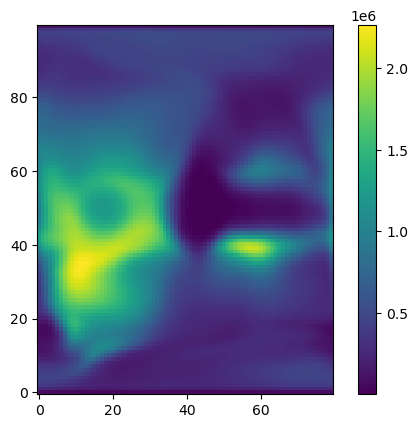

In [114]:
plt.imshow(f['data']['edens'][429,:,alt_idx,:].T, origin='lower')
plt.colorbar()
plt.show()
plt.close()

In [115]:
len(f['data']['edens'][429,:,alt_idx,:].flatten())

8000

In [116]:
x, y, z = interp_one_map(f['grid']['glon'][:,:,alt_idx].flatten(), f['grid']['glat'][:,:,alt_idx].flatten(),
                         f['data']['edens'][429,:,alt_idx,:].flatten())

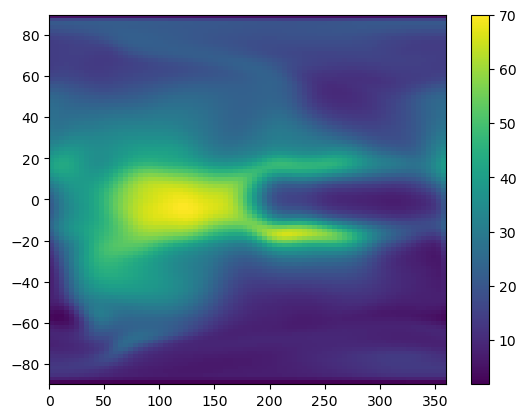

In [117]:
plt.imshow(f['data']['tec'][429,:,:].T, origin = 'lower',
           extent = [0,360,-90,90], aspect = 'auto')
plt.colorbar()
plt.show()
plt.close()

In [118]:
tecfits = make_fits(f['data']['tec'])
tecdiffs = (f['data']['tec'] - tecfits)

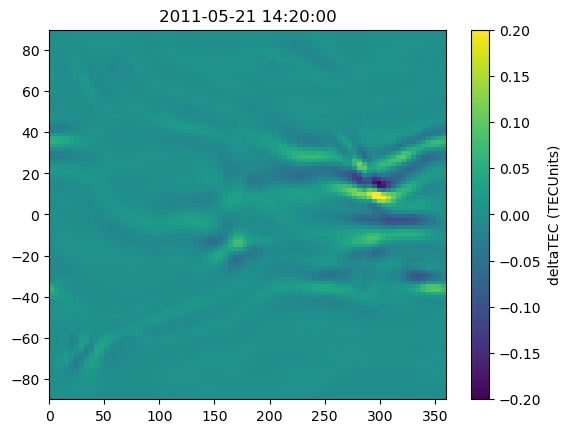

In [131]:
ntectime = 460

plt.imshow(tecdiffs[ntectime,:,:].T, origin = 'lower',
           extent = [0,360,-90,90], aspect = 'auto', vmin = -0.2, vmax = 0.2)
plt.colorbar(label = 'deltaTEC (TECUnits)')
plt.title(tectimes[ntectime])
plt.show()
plt.close()